<a href="https://colab.research.google.com/github/sreenathmt/DSA_ICTAK_Assignments_Case-Studies/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study on Pre-processing

## Do the following on titanic dataset.
*  Load the dataset into python environment
*  Make ‘PassengerId’ as the index column
*  Check the basic details of the dataset
*  Fill in all the missing values present in all the columns in the dataset
*  Check and handle outliers in at least 3 columns in the dataset
*  Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the dataset into python environment 

In [ ]:
# rezding dataset
df = pd.read_csv('titanic_dataset.csv')


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.Make ‘PassengerId’ as the index column

In [ ]:
df.set_index(['PassengerId'], inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.Check the basic details of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 11)

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* From this its clear that there are considerable null values in age and cabin , also gender categorical data is there.

### 4.Fill in all the missing values present in all the columns in the dataset

In [ ]:
# Checking data types
df.dtypes


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#Checking mean of age
df['Age'].mean()

29.69911764705882

In [ ]:
# Filling age nul lvalues with mean roundoff value
df['Age'].fillna(round(df['Age'].mean(), 0), inplace = True)

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
#Filling null value with mostly occuring value that's S here 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [ ]:
# Droping cabin value since most data is missing 
df.drop("Cabin" , axis =1 , inplace =True)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

* Now that our data is not having any missing value.

### 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Checking Outliers in Fare')

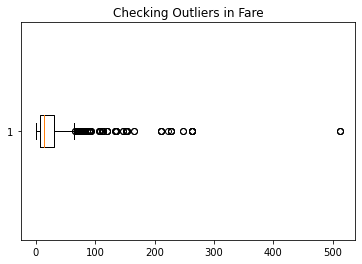

In [ ]:
# Outliers in Fare
plt.boxplot(df["Fare"],vert=False)
plt.title('Checking Outliers in Fare')

In [ ]:
# We are having outliers and need to work on it uding IQR

Fare_Q1 = np.percentile(df['Fare'],25, interpolation ='midpoint')
Fare_Q2 = np.percentile(df['Fare'],50, interpolation = 'midpoint')
Fare_Q3 = np.percentile(df['Fare'],75, interpolation = 'midpoint')

#Findding IQR ,Upper & lower limit

Fare_IQR = Fare_Q3-Fare_Q1
Fare_lower_limit = Fare_Q1 - 1.5*Fare_IQR
Fare_upper_limit = Fare_Q3+1.5*Fare_IQR
print("IQR is " , Fare_IQR)
print("Lower limit is " , Fare_lower_limit)
print("Upper limit is" , Fare_upper_limit)


IQR is  23.0896
Lower limit is  -26.724
Upper limit is 65.6344


In [ ]:
Fare_outlier = []

for x in df["Fare"]:
  if ((x > Fare_upper_limit) or (x < Fare_lower_limit)):
    Fare_outlier.append(x)
print("Fare outlier are " , Fare_outlier)

Fare outlier are  [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [ ]:
ind_outlier = df["Fare"] > Fare_upper_limit
ind1 = df.loc[ind_outlier].index
# we drop the outliers from our data
df.drop(ind1 , inplace = True)

Text(0.5, 1.0, ' Outliers in Fare')

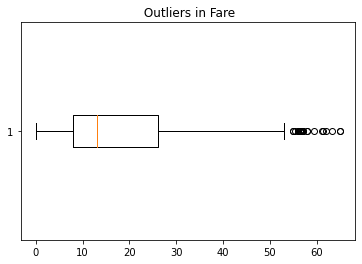

In [ ]:
# Outliers in Fare
plt.boxplot(df["Fare"],vert=False)
plt.title(' Outliers in Fare')

* Now that the outliers arre reduced

Text(0.5, 1.0, 'Checking Outliers in Age')

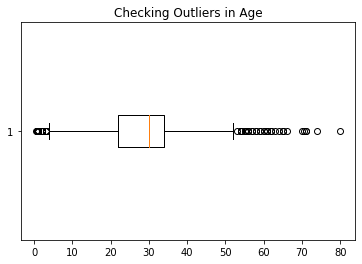

In [ ]:
plt.boxplot(df["Age"],vert=False)
plt.title('Checking Outliers in Age')

In [ ]:
#We see some outliers so we have to fix it 

Q1 = np.percentile(df["Age"] ,25 , interpolation = "midpoint")
Q2 = np.percentile(df["Age"] , 50 , interpolation ="midpoint")
Q3 = np.percentile(df["Age"] ,75 , interpolation ="midpoint")

#find IQR

IQR = Q3-Q1
print("IQR is " , IQR)

#find upper and lower limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR

outlier = []

for x in df["Age"]:
  if ((x > upper_limit) or (x < lower_limit)):
    outlier.append(x)
print("outlier are " , outlier)

IQR is  12.0
outlier are  [54.0, 2.0, 58.0, 55.0, 2.0, 66.0, 3.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 3.0, 2.0, 59.0, 54.0, 62.0, 3.0, 65.0, 54.0, 61.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 54.0, 2.0, 64.0, 62.0, 62.0, 53.0, 54.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 70.0, 60.0, 60.0, 0.67, 57.0, 54.0, 1.0, 0.42, 2.0, 1.0, 0.83, 74.0]


In [ ]:
#droping lower values
index_outlier_low = df["Age"] < lower_limit
df.drop(df.loc[index_outlier_low].index , inplace = True)


In [ ]:
#droping higher values
index_outlier_up = df["Age"] > upper_limit
df.drop(df.loc[index_outlier_up].index , inplace = True)

Text(0.5, 1.0, ' Outliers in Age')

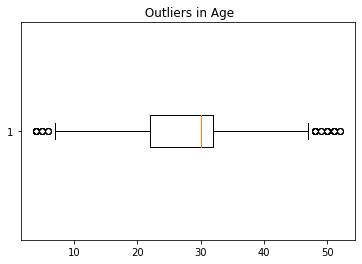

In [ ]:
plt.boxplot(df["Age"],vert=False)
plt.title(' Outliers in Age')

Text(0.5, 1.0, 'Checking outliers SibSp ')

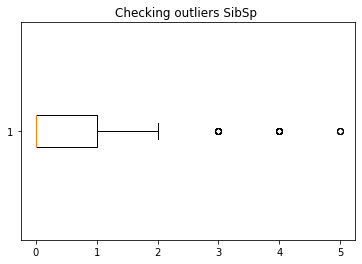

In [ ]:
plt.boxplot(df['SibSp'],vert=False)
plt.title('Checking outliers SibSp ')

In [ ]:
Q1 = np.percentile(df['SibSp'],25, interpolation ='midpoint')
Q2 = np.percentile(df['SibSp'],50, interpolation = 'midpoint')
Q3 = np.percentile(df['SibSp'],75, interpolation = 'midpoint')
IQR = Q3-Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(lower_limit)
print(upper_limit)
print(IQR)

-1.5
2.5
1.0


In [ ]:
outlier = []
for x in df['SibSp']:
    if ((x < lower_limit) or (x > upper_limit)):
        outlier.append(x)
print(outlier)

[3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 4, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 4, 3, 4]


In [ ]:
ind_sibsp = df['SibSp'] > upper_limit
df.drop((df.loc[ind_sibsp].index), inplace = True)

In [ ]:
df.shape

(681, 10)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
X = df[['Pclass', 'Age', 'SibSp','Parch','Fare']]

In [ ]:
y = df["Survived"]

In [ ]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,2.500734,29.080764,0.265786,0.268722,16.590772
std,0.721772,9.085344,0.495410,0.753252,13.260513
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,30.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.250000
max,3.000000,52.000000,2.000000,6.000000,65.000000


In [ ]:
#MIN MAX SCALING

from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X.head()

,0,1,2,3,4
0,1.0,0.375000,0.5,0.0,0.111538
1,1.0,0.458333,0.0,0.0,0.121923
2,0.0,0.645833,0.5,0.0,0.816923
3,1.0,0.645833,0.0,0.0,0.123846
4,1.0,0.541667,0.0,0.0,0.130128


In [ ]:
X.describe()

,0,1,2,3,4
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.750367,0.522516,0.132893,0.044787,0.255243
std,0.360886,0.189278,0.247705,0.125542,0.204008
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.395833,0.000000,0.000000,0.120834
50%,1.000000,0.541667,0.000000,0.000000,0.161538
75%,1.000000,0.604167,0.000000,0.000000,0.357692
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100, test_size = 0.2)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('MSE is:',mean_squared_error(y_test, predictions))

MSE is: 0.19292003363662996


* MSE value is low